In [38]:
library(openxlsx)
library(ggplot2)
library(tidyr) # for renaming columns
library(dplyr)

In [41]:
df = read.xlsx("assets/EsperancaVida.xlsx", sheet = 1, rows = seq(9, 73), cols = seq(1, 250))
df <- data.frame(df, row.names = 1)
df <- df[, c(42, 54, 56, 76, 88, 90)]
df <- rename(df, "Itália_Homens" = "IT...Itália.1", "Chipre_Homens" = "CY...Chipre.1", "Lituânia_Homens" = "LT...Lituânia.1")
df <- rename(df, "Itália_Mulheres" = "IT...Itália.2", "Chipre_Mulheres" = "CY...Chipre.2", "Lituânia_Mulheres" = "LT...Lituânia.2")
df <- df[as.character(seq(2002, 2019)), ]
df <- gather(df, key = "País", value = "Esperança_Média_Vida", 1:6)
df["Ano"] = rep(seq(2002, 2019), 6)

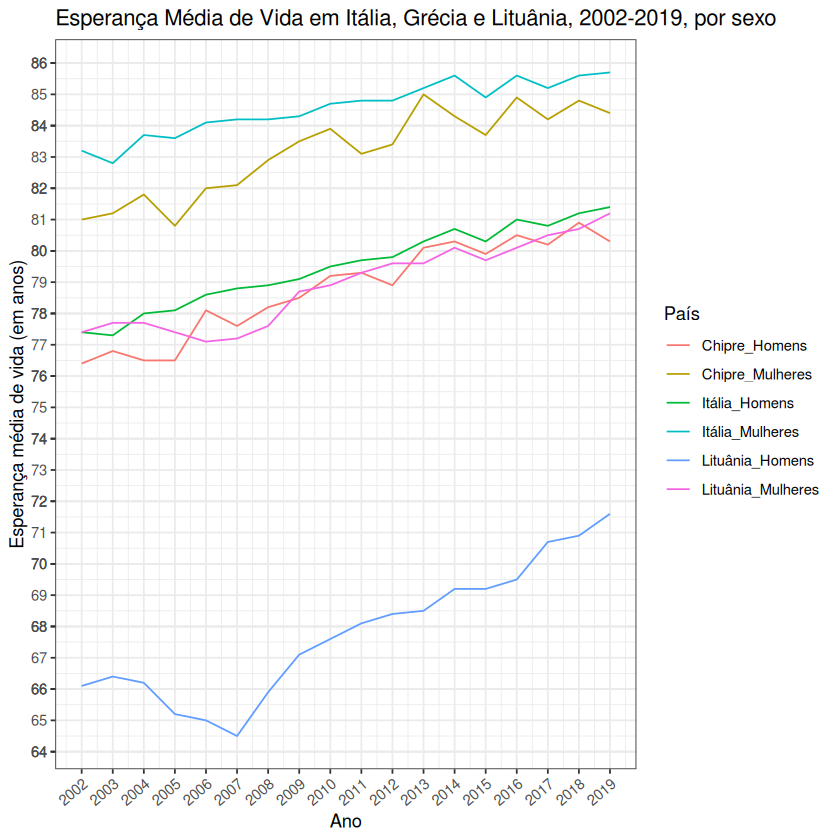

In [42]:
ggplot(df, aes(x = Ano, y = Esperança_Média_Vida, colour = País)) +
  geom_line() +
  labs(x = "Ano", y = "Esperança média de vida (em anos)") +
  ggtitle("Esperança Média de Vida em Itália, Grécia e Lituânia, 2002-2019, por sexo") +
  theme_bw() +
  theme(axis.text.x = element_text(angle = 40, hjust=1)) +
  scale_x_continuous(breaks = round(seq(2002, 2019, 1))) +
  scale_y_continuous(breaks = round(seq(40, 90, 0.5)))